## Principal Components Analysis using R

In [1]:
R.Version()

$platform
[1] "x86_64-pc-linux-gnu"

$arch
[1] "x86_64"

$os
[1] "linux-gnu"

$system
[1] "x86_64, linux-gnu"

$status
[1] ""

$major
[1] "3"

$minor
[1] "4.4"

$year
[1] "2018"

$month
[1] "03"

$day
[1] "15"

$`svn rev`
[1] "74408"

$language
[1] "R"

$version.string
[1] "R version 3.4.4 (2018-03-15)"

$nickname
[1] "Someone to Lean On"

In [2]:
if(!require(devtools)) install.packages("devtools")
devtools::install_github("kassambara/factoextra")

Loading required package: devtools
Skipping install of 'factoextra' from a github remote, the SHA1 (1012e1b5) has not changed since last install.
  Use `force = TRUE` to force installation


In [3]:
install.packages("FactoMineR")
install.packages("tidyverse")

Installing package into ‘/home/david/R/x86_64-pc-linux-gnu-library/3.4’
(as ‘lib’ is unspecified)
Installing package into ‘/home/david/R/x86_64-pc-linux-gnu-library/3.4’
(as ‘lib’ is unspecified)


In [4]:
library(factoextra)
library(FactoMineR)
library(tidyverse)

Loading required package: ggplot2
Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ tibble  2.0.1     ✔ purrr   0.3.0
✔ tidyr   0.8.2     ✔ dplyr   0.7.8
✔ readr   1.3.1     ✔ stringr 1.3.1
✔ tibble  2.0.1     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [5]:
# Load the data
data <- read.table("Caracteristicas_Calidad_del_Agua_SIVICAP_Santander.csv",header=TRUE,sep=",")
data

Municipalities,Samples,Apparent_Color,Turbinity,pH,Res_Cloride,Alkalinity,Calcium,Magnesium,Hardness,Sulfates,Iron,Clorures,Nitrites,Coliforms,E_Coli,IRCA,Level
Aguada,9,0.9055556,0.33666667,7.408889,1.2142857,46.000000,18.611111,12.601111,72.43333,17.911667,0.10000000,8.202222,0.010571429,905.0000000,300.0000000,9.874444,BAJO
Albania,7,0.7142857,0.23571429,7.500000,1.0000000,78.214286,25.742857,31.151429,154.68571,69.870000,0.05000000,5.165714,0.026200000,1292.8571429,1410.0000000,32.004285,MEDIO
Aratoca,9,1.8888889,0.42777778,7.265556,0.3857143,23.722222,6.100000,5.176667,27.66667,6.386667,0.09714286,4.178750,0.020571428,963.3750000,75.2500000,31.928888,MEDIO
Barbosa,9,0.3722222,0.96111111,7.702222,1.5566667,52.700000,35.611111,21.145556,123.71667,62.070000,0.12142857,10.981111,0.013200000,1396.3333333,85.1111111,30.994444,MEDIO
Barichara,11,0.3190000,0.69000000,7.327273,1.2000000,7.300000,3.550000,3.742222,21.79000,30.957143,0.11571429,7.495000,0.014625000,4.7000000,0.0000000,4.380000,SIN RIESGO
Barrancabermeja,40,2.4118116,0.76224638,7.085714,1.1388571,13.319203,10.491898,8.363406,45.78080,24.553482,0.30157895,10.277810,0.013938144,17.4637681,0.7737226,2.332142,SIN RIESGO
Betulia,11,4.2627273,0.62909091,6.072727,1.3055556,3.636364,3.936364,4.364545,22.12727,18.257500,0.06666667,6.446364,0.022666667,5.3000000,0.1000000,7.500909,BAJO
Bolívar,8,0.3950000,0.71000000,7.600000,0.9750000,133.562500,24.512500,24.838750,138.35000,28.862000,0.05333333,9.740000,0.020666667,3.2857143,0.0000000,4.807500,SIN RIESGO
Bucaramanga,41,0.3727273,0.25690909,7.387411,0.9634286,43.147727,20.740955,11.082727,71.47545,42.395882,0.01975000,7.698000,0.019358289,3.2130435,0.5304348,2.329419,SIN RIESGO
Cabrera,11,3.4545455,1.43272727,7.372727,0.7090909,35.181818,12.436364,10.039091,54.29455,15.575000,0.08555556,7.370000,0.017125000,0.3333333,0.0000000,7.025454,BAJO


In [6]:
data_n <- data %>% select(3:16)

In [7]:
data_n

Apparent_Color,Turbinity,pH,Res_Cloride,Alkalinity,Calcium,Magnesium,Hardness,Sulfates,Iron,Clorures,Nitrites,Coliforms,E_Coli
0.9055556,0.33666667,7.408889,1.2142857,46.000000,18.611111,12.601111,72.43333,17.911667,0.10000000,8.202222,0.010571429,905.0000000,300.0000000
0.7142857,0.23571429,7.500000,1.0000000,78.214286,25.742857,31.151429,154.68571,69.870000,0.05000000,5.165714,0.026200000,1292.8571429,1410.0000000
1.8888889,0.42777778,7.265556,0.3857143,23.722222,6.100000,5.176667,27.66667,6.386667,0.09714286,4.178750,0.020571428,963.3750000,75.2500000
0.3722222,0.96111111,7.702222,1.5566667,52.700000,35.611111,21.145556,123.71667,62.070000,0.12142857,10.981111,0.013200000,1396.3333333,85.1111111
0.3190000,0.69000000,7.327273,1.2000000,7.300000,3.550000,3.742222,21.79000,30.957143,0.11571429,7.495000,0.014625000,4.7000000,0.0000000
2.4118116,0.76224638,7.085714,1.1388571,13.319203,10.491898,8.363406,45.78080,24.553482,0.30157895,10.277810,0.013938144,17.4637681,0.7737226
4.2627273,0.62909091,6.072727,1.3055556,3.636364,3.936364,4.364545,22.12727,18.257500,0.06666667,6.446364,0.022666667,5.3000000,0.1000000
0.3950000,0.71000000,7.600000,0.9750000,133.562500,24.512500,24.838750,138.35000,28.862000,0.05333333,9.740000,0.020666667,3.2857143,0.0000000
0.3727273,0.25690909,7.387411,0.9634286,43.147727,20.740955,11.082727,71.47545,42.395882,0.01975000,7.698000,0.019358289,3.2130435,0.5304348
3.4545455,1.43272727,7.372727,0.7090909,35.181818,12.436364,10.039091,54.29455,15.575000,0.08555556,7.370000,0.017125000,0.3333333,0.0000000


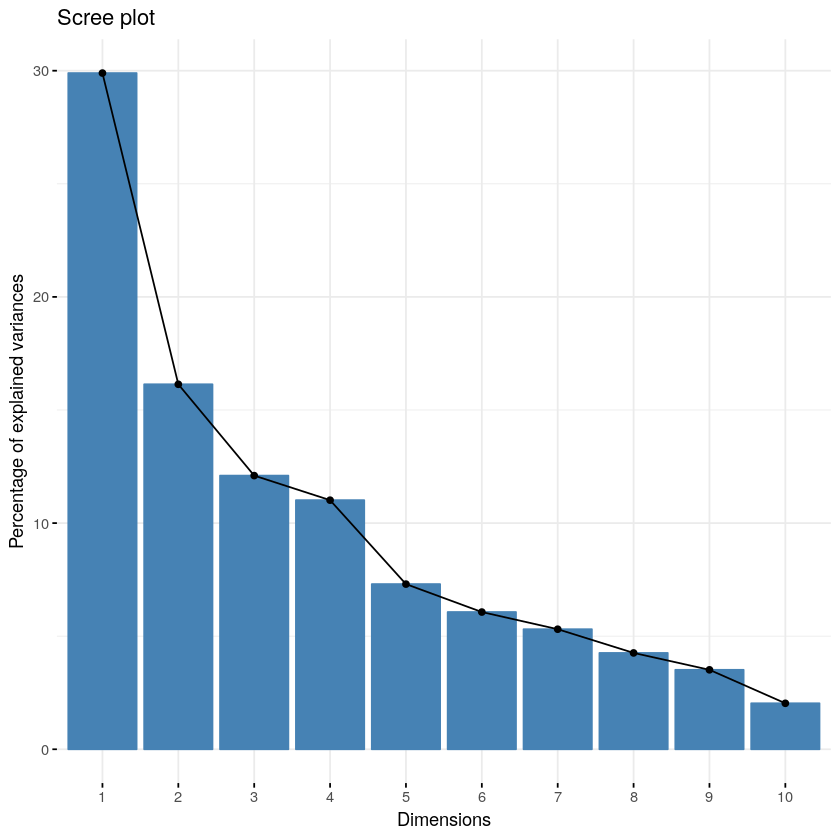

In [8]:
# Compute principal component analysis
library(FactoMineR)
res.pca <- prcomp(data_n, scale = TRUE)
# Percentage of information retained by each dimensions
fviz_eig(res.pca)

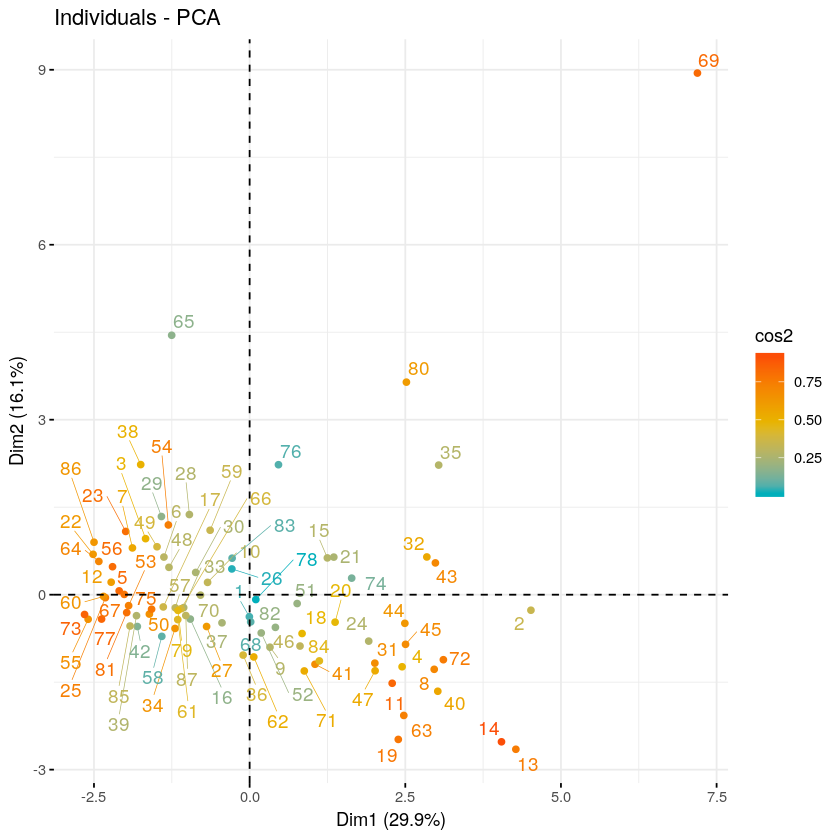

In [9]:
fviz_pca_ind(res.pca,
             col.ind = "cos2", # Color by the quality of representation
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE     # Avoid text overlapping
             )

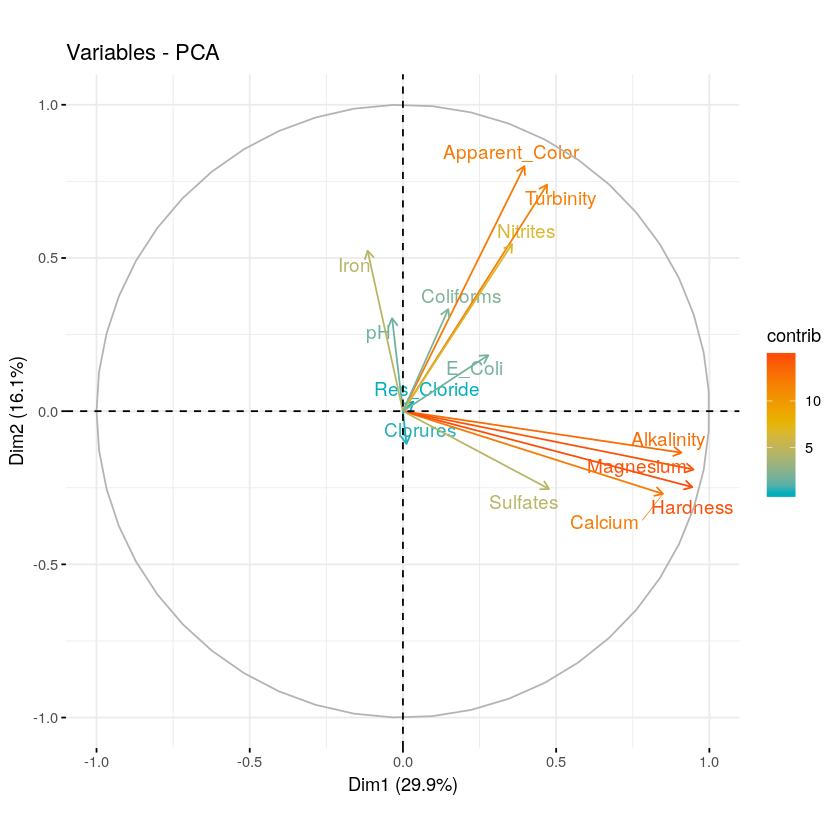

In [10]:
fviz_pca_var(res.pca,
             col.var = "contrib", # Color by contributions to the PC
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE     # Avoid text overlapping
             )

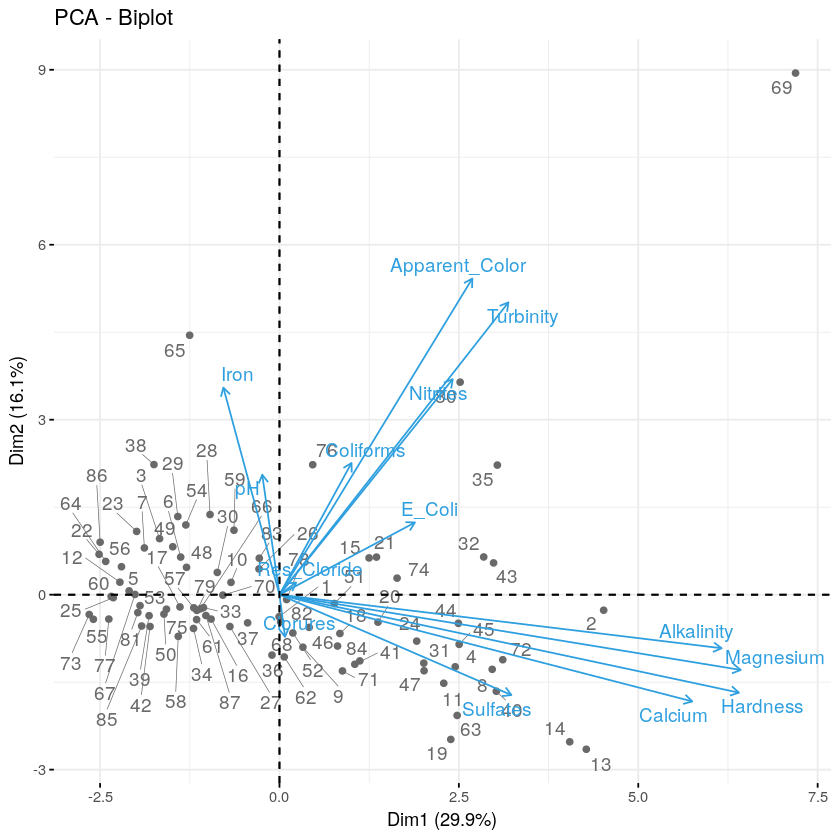

In [11]:
fviz_pca_biplot(res.pca, repel = TRUE,
                col.var = "#2E9FDF", # Variables color
                col.ind = "#696969"  # Individuals color
                )

In [12]:
# Eigenvalues
eig.val <- get_eigenvalue(res.pca)
eig.val
  
# Results for Variables
res.var <- get_pca_var(res.pca)
res.var$coord          # Coordinates
res.var$contrib        # Contributions to the PCs
res.var$cos2           # Quality of representation 
# Results for individuals
res.ind <- get_pca_ind(res.pca)
res.ind$coord          # Coordinates
res.ind$contrib        # Contributions to the PCs
res.ind$cos2           # Quality of representation 

,eigenvalue,variance.percent,cumulative.variance.percent
Dim.1,4.18524577,29.8946127,29.89461
Dim.2,2.25891235,16.1350882,46.02970
Dim.3,1.69382365,12.0987404,58.12844
Dim.4,1.54173753,11.0124110,69.14085
Dim.5,1.02219730,7.3014093,76.44226
Dim.6,0.84931344,6.0665245,82.50879
Dim.7,0.74304805,5.3074861,87.81627
Dim.8,0.59630038,4.2592884,92.07556
Dim.9,0.49174126,3.5124376,95.58800
Dim.10,0.28456077,2.0325769,97.62058


,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5,Dim.6,Dim.7,Dim.8,Dim.9,Dim.10,Dim.11,Dim.12,Dim.13,Dim.14
Apparent_Color,0.39642061,0.79953160,-0.07000234,0.315975837,-0.00300840,0.15348722,-0.007026944,0.20939658,-0.052354414,0.025138108,-0.01862136,0.128849977,0.1050890697,-5.429963e-03
Turbinity,0.47059850,0.73929465,-0.06071433,0.308853588,-0.01826973,0.20173641,-0.105328859,0.21114821,-0.014602939,-0.088858880,-0.04052300,-0.134464692,-0.0909526052,9.498639e-03
pH,-0.03544803,0.30327574,-0.49106680,-0.715900712,0.12835868,0.03495947,0.105619527,-0.06411294,0.022565842,-0.337097495,-0.07139820,-0.001613346,0.0299751690,-8.747685e-05
Res_Cloride,0.03417400,0.03075872,0.50974090,-0.099975887,0.66907542,0.29665233,-0.385425599,-0.12864725,0.149152457,-0.041591101,0.05583569,0.010613885,0.0086166110,-2.596436e-03
Alkalinity,0.90891031,-0.13545984,-0.17356263,0.001549982,-0.10562092,-0.13222824,-0.195489964,-0.03911030,0.006312303,-0.114204720,0.11214610,0.134047452,-0.1143507949,-1.777981e-02
Calcium,0.84850212,-0.26994256,-0.09477515,-0.055860102,0.09214622,-0.05481713,-0.085561128,-0.03000075,0.151188795,0.122896346,-0.37059831,0.005678972,0.0007370948,-4.292466e-03
Magnesium,0.94825026,-0.19038981,-0.08972022,-0.051405213,-0.02377018,-0.06680939,-0.060722970,-0.02893259,-0.078212493,0.010676451,0.12619646,-0.099964399,0.0790018582,-7.705291e-02
Hardness,0.94452351,-0.24779158,-0.09910619,-0.064776035,-0.01943240,-0.03525723,-0.055725781,-0.02395001,-0.023380878,0.003770176,0.11355574,-0.032350581,0.0550923922,9.807915e-02
Sulfates,0.47668550,-0.25381931,0.12073092,-0.284661691,0.10266443,0.51248134,0.538531589,0.18066484,0.059628625,0.092431000,0.05414641,0.021529840,-0.0369171112,-6.927487e-03
Iron,-0.11533197,0.52366882,-0.49219859,-0.534702889,0.16211147,-0.08896691,-0.134005063,-0.03925238,-0.028576595,0.350195917,0.07810467,-0.004308322,-0.0321747394,1.269360e-03


,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5,Dim.6,Dim.7,Dim.8,Dim.9,Dim.10,Dim.11,Dim.12,Dim.13,Dim.14
Apparent_Color,3.754840508,28.29905187,0.2893056,6.475858e+00,8.853935e-04,2.7738084,0.006645324,7.35316110,0.557403840,0.222070121,0.16763439,25.738781106,24.17726580,1.832888e-01
Turbinity,5.291515911,24.19556351,0.2176277,6.187210e+00,3.265350e-02,4.7918212,1.493062076,7.47669583,0.043365452,2.774767773,0.79385965,28.030820329,18.11016375,5.608734e-01
pH,0.030023639,4.07170174,14.2368186,3.324261e+01,1.611817e+00,0.1439003,1.501314020,0.68932869,0.103553894,39.933375361,2.46442170,0.004035287,1.96704987,4.756948e-05
Res_Cloride,0.027904276,0.04188294,15.3401913,6.483061e-01,4.379408e+01,10.3616172,19.992366888,2.77546614,4.524016428,0.607891125,1.50717693,0.174649787,0.16254180,4.190804e-02
Alkalinity,19.738815921,0.81230983,1.7784606,1.558271e-04,1.091353e+00,2.0586401,5.143183696,0.25651769,0.008102874,4.583456067,6.08007342,27.857132772,28.62664592,1.965152e+00
Calcium,17.202235813,3.22584381,0.5302990,2.023918e-01,8.306542e-01,0.3538055,0.985226554,0.15093815,4.648390019,5.307657722,66.39682958,0.049998703,0.00118943,1.145396e-01
Magnesium,21.484486513,1.60467839,0.4752395,1.713973e-01,5.527517e-02,0.5255415,0.496236963,0.14038136,1.243986327,0.040057038,7.69900920,15.492089773,13.66364919,3.690797e+01
Hardness,21.315944555,2.71815174,0.5798737,2.721562e-01,3.694180e-02,0.1463620,0.417922185,0.09619362,0.111169332,0.004995147,6.23388340,1.622495380,6.64469960,5.979921e+01
Sulfates,5.429288407,2.85200283,0.8605356,5.255906e+00,1.031111e+00,30.9234626,39.030621516,5.47371506,0.723057661,3.002342798,1.41735893,0.718622628,2.98364748,2.983276e-01
Iron,0.317817963,12.13987042,14.3025192,1.854448e+01,2.570945e+00,0.9319422,2.416715421,0.25838472,0.166067371,43.097008645,2.94913358,0.028776344,2.26632489,1.001641e-02


,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5,Dim.6,Dim.7,Dim.8,Dim.9,Dim.10,Dim.11,Dim.12,Dim.13,Dim.14
Apparent_Color,0.1571493037,0.639250779,0.004900327,9.984073e-02,9.050468e-06,0.023558327,4.937795e-05,0.0438469276,2.740985e-03,6.319245e-04,0.0003467549,1.660232e-02,1.104371e-02,2.948450e-05
Turbinity,0.2214629460,0.546556573,0.003686229,9.539054e-02,3.337832e-04,0.040697581,1.109417e-02,0.0445835657,2.132458e-04,7.895901e-03,0.0016421139,1.808075e-02,8.272376e-03,9.022413e-05
pH,0.0012565631,0.091976174,0.241146601,5.125138e-01,1.647595e-02,0.001222165,1.115548e-02,0.0041104696,5.092172e-04,1.136347e-01,0.0050977033,2.602886e-06,8.985108e-04,7.652200e-09
Res_Cloride,0.0011678625,0.000946099,0.259835788,9.995178e-03,4.476619e-01,0.088002607,1.485529e-01,0.0165501152,2.224646e-02,1.729820e-03,0.0031176243,1.126546e-04,7.424598e-05,6.741480e-06
Alkalinity,0.8261179592,0.018349367,0.030123986,2.402445e-06,1.115578e-02,0.017484307,3.821633e-02,0.0015296160,3.984517e-05,1.304272e-02,0.0125767480,1.796872e-02,1.307610e-02,3.161216e-04
Calcium,0.7199558474,0.072868984,0.008982330,3.120351e-03,8.490925e-03,0.003004918,7.320707e-03,0.0009000448,2.285805e-02,1.510351e-02,0.1373431101,3.225072e-05,5.433088e-07,1.842526e-05
Magnesium,0.8991785639,0.036248278,0.008049718,2.642496e-03,5.650213e-04,0.004463494,3.687279e-03,0.0008370946,6.117194e-03,1.139866e-04,0.0159255476,9.992881e-03,6.241294e-03,5.937151e-03
Hardness,0.8921246687,0.061400666,0.009822038,4.195935e-03,3.776180e-04,0.001243072,3.105363e-03,0.0005736029,5.466655e-04,1.421423e-05,0.0128949069,1.046560e-03,3.035172e-03,9.619519e-03
Sulfates,0.2272290636,0.064424244,0.014575956,8.103228e-02,1.053999e-02,0.262637122,2.900163e-01,0.0326397837,3.555573e-03,8.543490e-03,0.0029318340,4.635340e-04,1.362873e-03,4.799007e-05
Iron,0.0133014628,0.274229033,0.242259453,2.859072e-01,2.628013e-02,0.007915110,1.795736e-02,0.0015407491,8.166218e-04,1.226372e-01,0.0061003391,1.856164e-05,1.035214e-03,1.611276e-06


,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5,Dim.6,Dim.7,Dim.8,Dim.9,Dim.10,Dim.11,Dim.12,Dim.13,Dim.14
1,-0.004307497,-0.37792313,0.66962879,-0.54504484,0.17657363,-1.102344070,-0.47065790,0.52136522,-0.389174794,-0.03713620,-0.282062961,-0.03883975,0.13324854,0.068470763
2,4.517901935,-0.26652668,3.86437009,-2.63976057,0.03756735,-0.833476288,2.37354307,-0.63352448,-3.143400336,0.28371278,0.004022849,-0.24530543,-0.03881932,-0.098899550
3,-1.671034049,0.96064632,0.71365579,0.07480371,-1.33534178,-0.722220122,-0.07907828,-0.99224893,0.147959521,-0.13949476,-0.015840965,0.01250553,0.13820769,0.027933420
4,2.448836373,-1.23586248,0.25668724,-1.07160942,1.17970086,-0.190325355,1.20966350,1.03322584,1.234755924,0.83834597,-0.337623503,-0.42363221,0.12683288,0.044086492
5,-2.095182139,0.06513353,0.08343421,0.12327996,0.23941824,0.566291567,0.57882873,-0.09835397,-0.170100317,0.14084958,0.274516307,-0.15377785,-0.17037012,0.024529557
6,-1.376770607,0.64484195,-1.11626955,-0.35913992,1.11656820,-0.381522784,0.08684079,0.08697020,-0.236265918,1.55838332,0.409765601,-0.24363237,-0.03531859,0.068561634
7,-1.882574148,0.80156370,0.59127115,1.04295344,-0.10399620,0.344837440,0.51211761,-1.16476356,-0.114675266,-0.02380646,0.091011437,0.04917073,0.39879042,0.015194868
8,2.964551786,-1.27953341,-0.82591853,0.51522456,0.21622722,-0.882320087,-0.04880895,-1.06556937,0.055272947,-0.63033974,0.776698591,0.46418387,-0.47463599,-0.157104809
9,0.326729550,-0.90048805,0.15422947,0.39089689,0.08674542,0.527882782,1.10590544,-0.63457722,0.226098183,-0.19653585,-0.405818715,0.07118764,-0.06813676,0.061781337
10,-0.675513830,0.21078035,-0.30293865,0.67096032,-0.23740554,-0.208474035,-0.05316136,-0.49169860,-0.240955165,-0.17401703,-0.102111493,-0.03162247,0.23607726,0.012926872


,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5,Dim.6,Dim.7,Dim.8,Dim.9,Dim.10,Dim.11,Dim.12,Dim.13,Dim.14
1,5.095769e-06,0.072675549,0.304285175,0.221480132,0.035058853,1.6445500416,0.342668794,0.52396198,3.540247e-01,5.570583e-03,4.420927e-01,0.026881456,0.44678417,3.349910e-01
2,5.605746e+00,0.036146209,10.133745185,5.195165368,0.001586964,0.9401545470,8.714813159,0.77364632,2.309636e+01,3.251349e-01,8.992672e-05,1.072295208,0.03792003,6.988942e-01
3,7.668852e-01,0.469578731,0.345613059,0.004171734,2.005076231,0.7059142048,0.009673381,1.89782837,5.117171e-02,7.859981e-02,1.394391e-03,0.002786790,0.48065921,5.575336e-02
4,1.646946e+00,0.777180081,0.044711692,0.856137157,1.564911593,0.0490236958,2.263565164,2.05781430,3.563743e+00,2.838914e+00,6.334124e-01,3.197996546,0.40479632,1.388781e-01
5,1.205600e+00,0.002158692,0.004723902,0.011330662,0.064455572,0.4340032093,0.518279465,0.01864659,6.763233e-02,8.013401e-02,4.187526e-01,0.421393256,0.73039821,4.299344e-02
6,5.205746e-01,0.211586487,0.845572236,0.096160712,1.401898361,0.1969943230,0.011665715,0.01457997,1.304807e-01,9.809668e+00,9.330227e-01,1.057718285,0.03138916,3.358808e-01
7,9.733386e-01,0.326932016,0.237238919,0.810961329,0.012161328,0.1609316918,0.405698378,2.61511751,3.073857e-02,2.289261e-03,4.602705e-02,0.043083738,4.00186341,1.649745e-02
8,2.413670e+00,0.833076011,0.462899782,0.197908031,0.052573484,1.0535741010,0.003685215,2.18866412,7.141169e-03,1.604926e+00,3.352172e+00,3.839548224,5.66883961,1.763607e+00
9,2.931815e-02,0.412607650,0.016141627,0.113918625,0.008461340,0.3771271039,1.891907226,0.77621963,1.194918e-01,1.560232e-01,9.151354e-01,0.090304453,0.11682502,2.727328e-01
10,1.253223e-01,0.022606931,0.062276176,0.335632477,0.063376419,0.0588188729,0.004371757,0.46602970,1.357115e-01,1.223177e-01,5.793893e-02,0.017819340,1.40242989,1.194015e-02


,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5,Dim.6,Dim.7,Dim.8,Dim.9,Dim.10,Dim.11,Dim.12,Dim.13,Dim.14
1,6.432830e-06,0.0495175347,0.1554605854,0.1029950923,1.080945e-02,4.212951e-01,0.0768002736,0.0942401942,5.250993e-02,4.781311e-04,2.758317e-02,5.230038e-04,6.155694e-03,1.625408e-03
2,3.450894e-01,0.0012009901,0.2524733055,0.1178113454,2.386048e-05,1.174477e-02,0.0952472122,0.0067855467,1.670542e-01,1.360868e-03,2.736060e-07,1.017355e-03,2.547733e-05,1.653662e-04
3,3.680307e-01,0.1216299532,0.0671260479,0.0007374962,2.350165e-01,6.874683e-02,0.0008241911,0.1297641611,2.885355e-03,2.564657e-03,3.307324e-05,2.061188e-05,2.517549e-03,1.028399e-04
4,3.935920e-01,0.1002459976,0.0043244940,0.0753702217,9.134200e-02,2.377497e-03,0.0960408293,0.0700676043,1.000666e-01,4.612892e-02,7.481559e-03,1.177890e-02,1.055821e-03,1.275669e-04
5,8.257193e-01,0.0007979912,0.0013094146,0.0028587346,1.078210e-02,6.032107e-02,0.0630215388,0.0018195862,5.442508e-03,3.731642e-03,1.417507e-02,4.448119e-03,5.459787e-03,1.131796e-04
6,2.426597e-01,0.0532330109,0.1595190772,0.0165120820,1.596044e-01,1.863440e-02,0.0009654327,0.0009683123,7.146224e-03,3.109017e-01,2.149540e-02,7.598790e-03,1.596913e-04,6.017787e-04
7,4.690244e-01,0.0850290486,0.0462662836,0.1439531183,1.431285e-03,1.573693e-02,0.0347080853,0.1795422986,1.740327e-03,7.500337e-05,1.096183e-03,3.199665e-04,2.104654e-02,3.055520e-05
8,5.936013e-01,0.1105808708,0.0460734958,0.0179295695,3.157894e-03,5.258103e-02,0.0001609073,0.0766902585,2.063488e-04,2.683652e-02,4.074570e-02,1.455314e-02,1.521592e-02,1.667077e-03
9,3.260524e-02,0.2476660627,0.0072651625,0.0466697016,2.298284e-03,8.511098e-02,0.3735481401,0.1229927610,1.561366e-02,1.179761e-02,5.030078e-02,1.547817e-03,1.417991e-03,1.165803e-03
10,2.957750e-01,0.0287973915,0.0594842919,0.2918008769,3.653210e-02,2.817065e-02,0.0018318296,0.1567078863,3.763270e-02,1.962802e-02,6.758373e-03,6.481634e-04,3.612445e-02,1.083128e-04


In [13]:
# Compute PCA with ncp = 3
res.pca <- PCA(data_n, ncp = 3, graph = FALSE)
# Compute HCPC
res.hcpc <- HCPC(res.pca, graph = FALSE)

In [14]:
# Variable describing clusters
res.hcpc$desc.var


Link between the cluster variable and the quantitative variables
                    Eta2      P-value
Calcium        0.6887397 5.142797e-22
Hardness       0.6867935 6.681804e-22
Magnesium      0.6827651 1.142879e-21
Alkalinity     0.6414795 1.947998e-19
E_Coli         0.5581551 1.262801e-15
Apparent_Color 0.3282154 5.541933e-08
Turbinity      0.3241666 7.132887e-08
Nitrites       0.2323586 1.501936e-05
Coliforms      0.2090202 5.283800e-05
Sulfates       0.1741865 3.228816e-04
Res_Cloride    0.1423679 1.579951e-03

Description of each cluster by quantitative variables
$`1`
              v.test Mean in category Overall mean sd in category Overall sd
E_Coli     -1.972872       18.9869244    58.828975     57.0557923 228.275647
Turbinity  -2.346594        0.9846402     1.714198      0.9967099   3.514300
Sulfates   -3.870287       22.2796311    27.590601     11.8804558  15.511277
Alkalinity -7.426446       23.8424463    46.146060     14.9766944  33.947754
Calcium    -7.624339        8.858

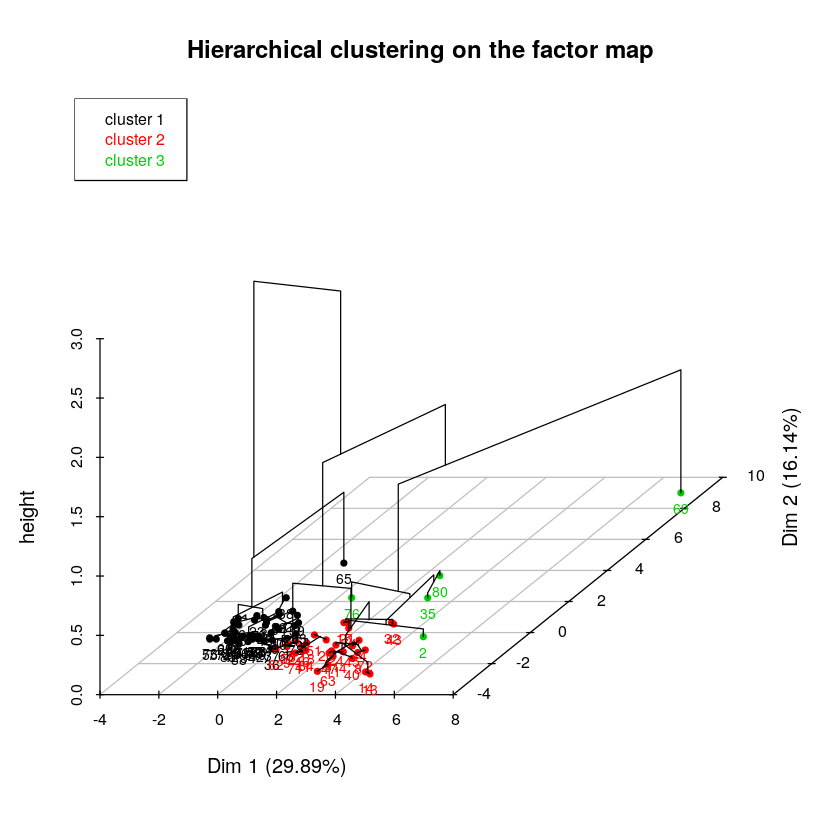

In [15]:
# Principal components + tree
plot(res.hcpc, choice = "3D.map")

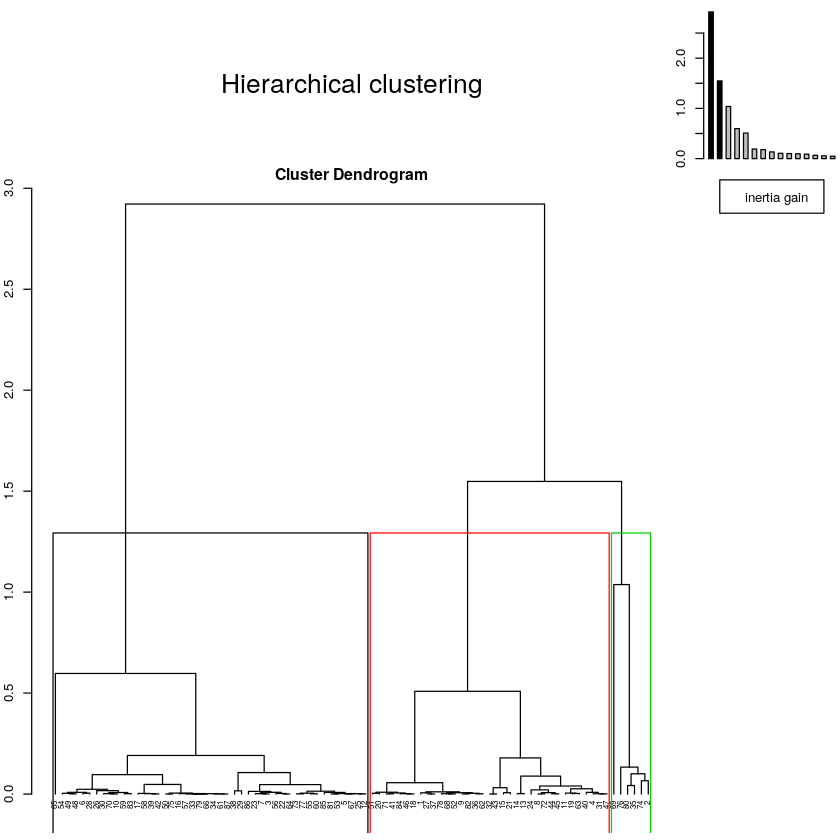

In [16]:
# Plot the dendrogram only
plot(res.hcpc, choice ="tree", cex = 0.6)

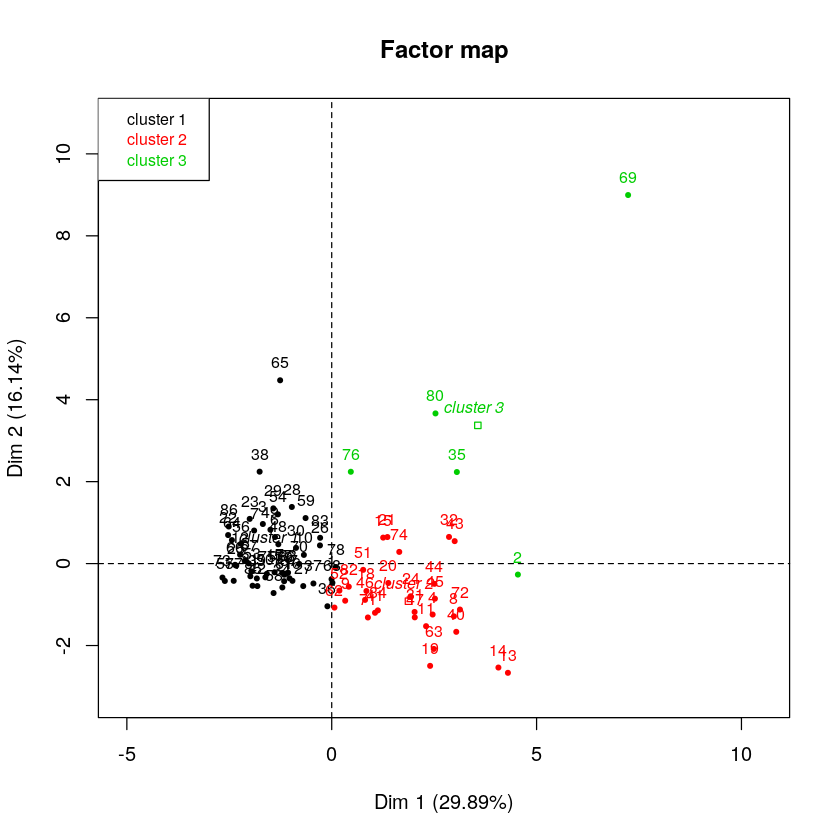

In [17]:
# Draw only the factor map
plot(res.hcpc, choice ="map", draw.tree = FALSE)

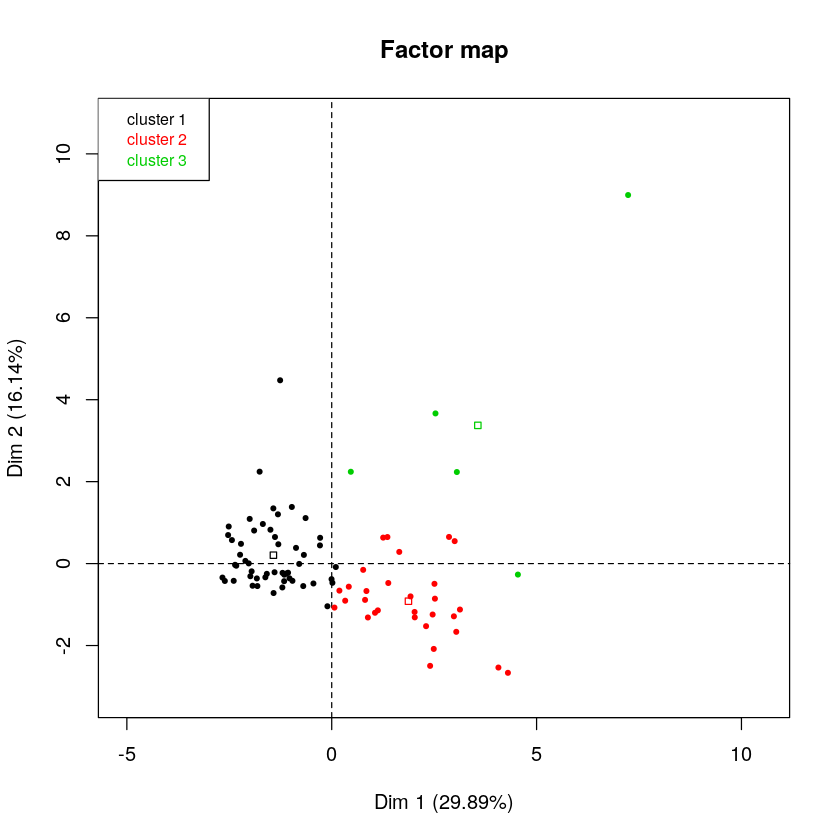

In [18]:
# Remove labels and add cluster centers
plot(res.hcpc, choice ="map", draw.tree = FALSE,
     ind.names = FALSE, centers.plot = TRUE)

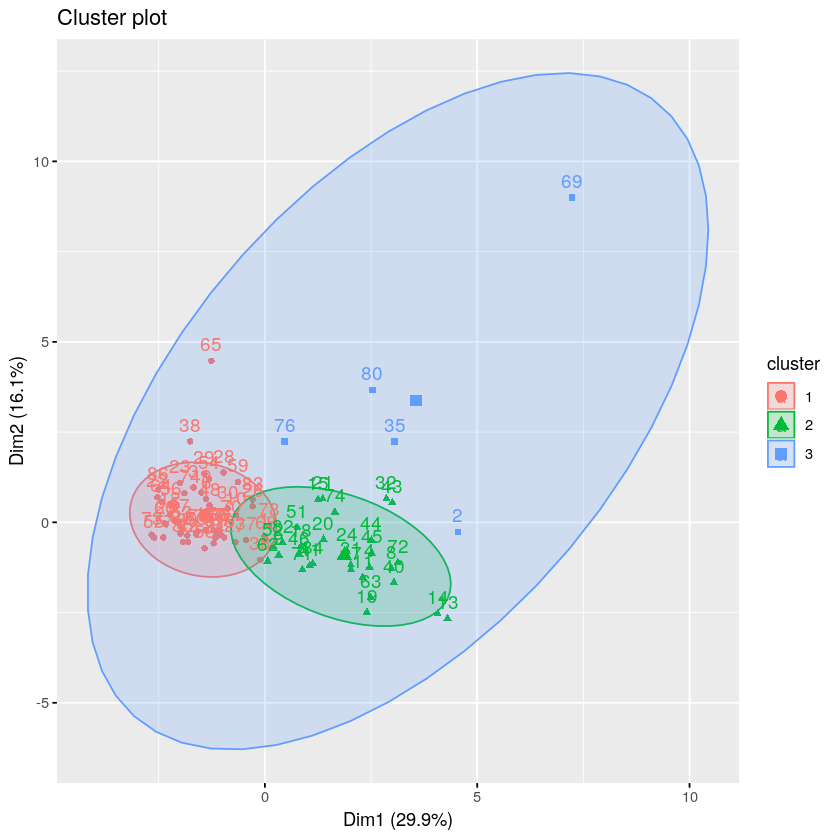

In [27]:
fviz_cluster(res.hcpc,choose.vars = NULL, stand = TRUE,
  axes = c(1, 2), geom = c("point", "text"), repel = FALSE,
  show.clust.cent = TRUE, ellipse = TRUE, ellipse.type = "t",
  ellipse.level = 0.95, ellipse.alpha = 0.2, shape = NULL,
  pointsize = 1.5, labelsize = 12, main = "Cluster plot", xlab = NULL,
  ylab = NULL, outlier.color = "black", outlier.shape = 19)

In [20]:
t.test(data_n[,14],conf.level = 0.99,mu=58.82)


	One Sample t-test

data:  data_n[, 14]
t = 0.00036462, df = 86, p-value = 0.9997
alternative hypothesis: true mean is not equal to 58.82
99 percent confidence interval:
  -6.013731 123.671682
sample estimates:
mean of x 
 58.82898 


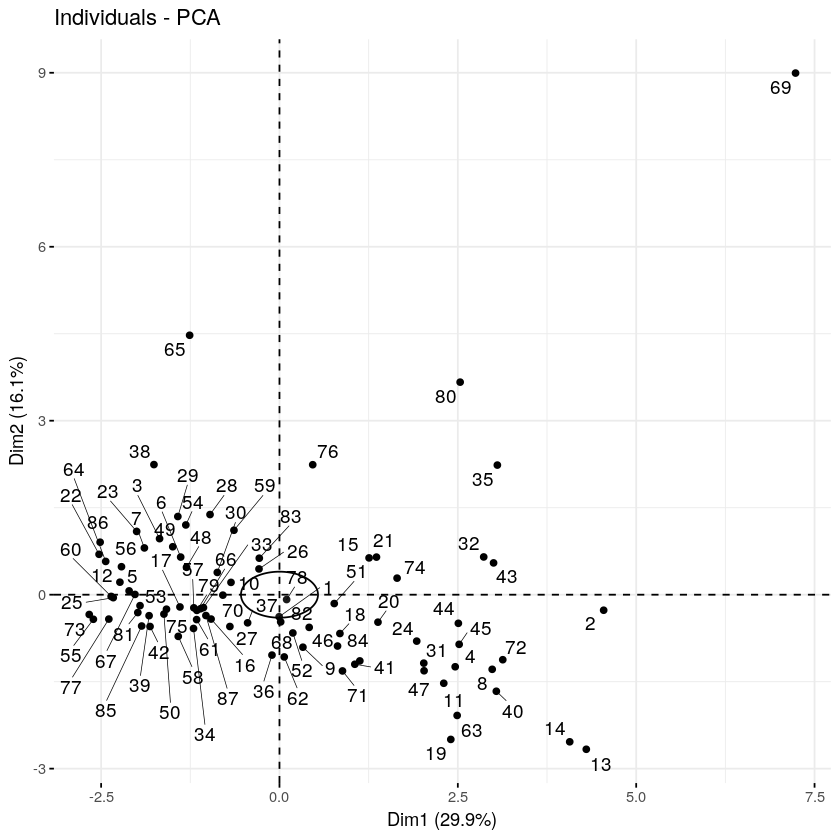

In [22]:
fviz_pca_ind(res.pca,
             palette = c("#00AFBB",  "#FC4E07"),
             addEllipses = TRUE, # Concentration ellipses
             ellipse.type = "confidence",
             legend.title = "Groups",
             repel = TRUE
             )